In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy.stats as st
import RELACS as rel
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# NPC48h

In [2]:
### IMPORT DIFFERENTIAL EXPRESSION ANALYSIS FOR NPC48h ###

exp_de_npc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
exp_de_npc_up = exp_de_npc.loc[(exp_de_npc.padj<0.05)&(exp_de_npc.log2FoldChange>0)].index
exp_de_npc_down = exp_de_npc.loc[(exp_de_npc.padj<0.05)&(exp_de_npc.log2FoldChange<0)].index

In [3]:
### IMPORT DIFFERENTIAL H3K4me3 PEAKS ANALYSIS FOR NPC48h ###

peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me3/REFERENCE_TABLE_H3K4me3.bed",sep="\t")
de_peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me3/resLFC_normal.tsv",sep="\t")
de_peaks_npc.columns = ["{}_normal".format(i) for i in list(de_peaks_npc)]
de_peaks_npc = de_peaks_npc[["log2FoldChange_normal"]]
df = peaks_npc.merge(de_peaks_npc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000116480.1,15,80711225,80712509,15_80711225_80712509,242.215231,-0.022778,0.795513,0.999872,ENSMUSG00000047888.10,Tnrc6b,promoter-TSS,ENSMUSG00000116480.1,-0.022778
ENSMUSG00000116480.1,15,80711225,80712509,15_80711225_80712509,242.215231,-0.022778,0.795513,0.999872,ENSMUSG00000116480.1,RP23-8E3.2,promoter-TSS,ENSMUSG00000116480.1,-0.022778
ENSMUSG00000042269.15,8,120177580,120177932,8_120177580_120177932,27.869808,0.002747,0.950853,0.999872,ENSMUSG00000092329.1,AC114005.5,promoter-TSS,ENSMUSG00000042269.15,0.002747
ENSMUSG00000042269.15,8,120177580,120177932,8_120177580_120177932,27.869808,0.002747,0.950853,0.999872,ENSMUSG00000042269.15,Fam92b,promoter-TSS,ENSMUSG00000042269.15,0.002747
ENSMUSG00000018677.9,11,102406339,102408482,11_102406339_102408482,239.411107,-0.033666,0.692603,0.999872,ENSMUSG00000018677.9,Slc25a39,promoter-TSS,ENSMUSG00000018677.9,-0.033666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000021461.17,13,63430524,63432230,13_63430524_63432230,317.227873,-0.071979,0.420617,0.999872,ENSMUSG00000021461.17,Fancc,promoter-TSS,ENSMUSG00000021461.17,-0.071979
ENSMUSG00000092655.1,19,60578372,60581490,19_60578372_60581490,431.739879,-0.018487,0.836489,0.999872,ENSMUSG00000092655.1,Gm25238,promoter-TSS,ENSMUSG00000092655.1,-0.018487
ENSMUSG00000092655.1,19,60578372,60581490,19_60578372_60581490,431.739879,-0.018487,0.836489,0.999872,ENSMUSG00000033417.15,Cacul1,promoter-TSS,ENSMUSG00000092655.1,-0.018487


In [55]:
def ECDF(data, minimum, maximus):
    
    """
    This function provides the ECDF for a vector, defines in a domain [minumus, maximus]
    """
    
    levels = np.linspace(0, 1, len(data) + 1)
    x = sorted(list(data) + [max(data), minimum, maximus])
    y = np.array([0] + list(levels) + [1.])
    
    
    return x,y

/package/anaconda3/bin/ipython:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/package/anaconda3/bin/ipython:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from IPython import start_ipython


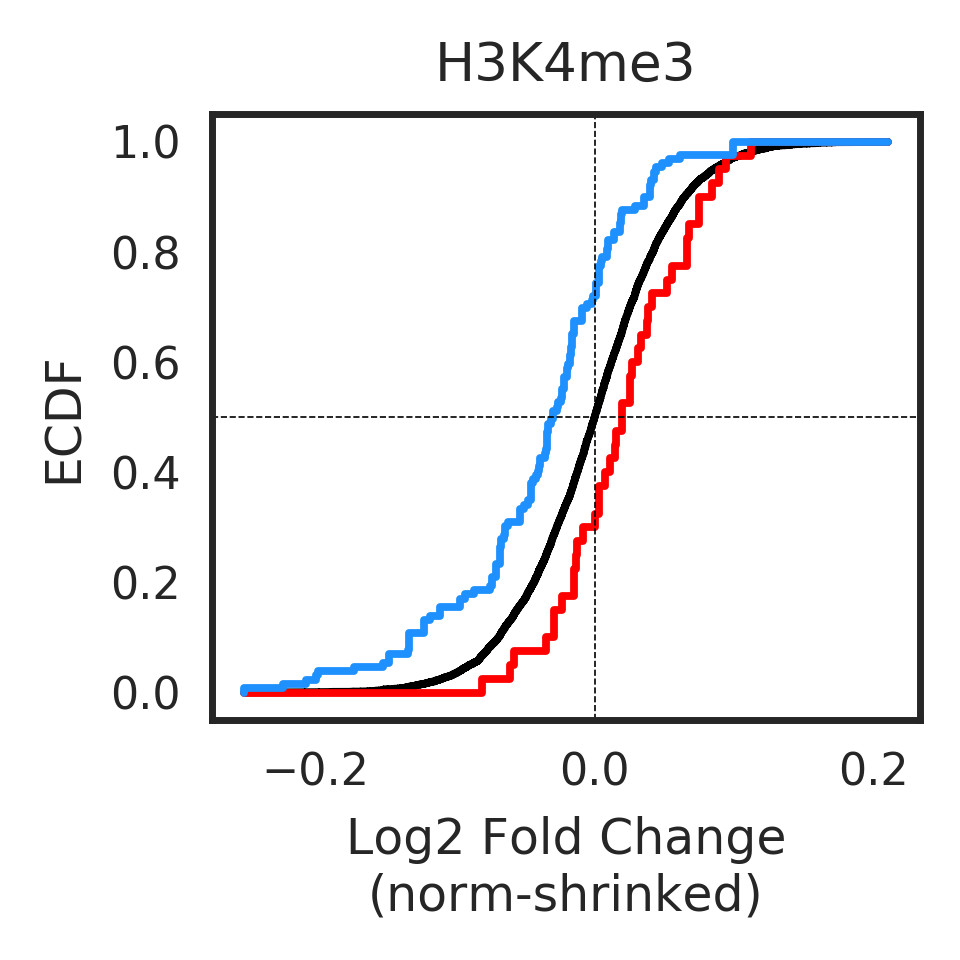

In [56]:
### PLOT EMPIRICAL COMULATIVE DENSITY FUNCTION OF LOG2FC OF H3K4me3 PEAKS OVERLAPPING PROMOTERS OF DEG IN NPC48h

plt.figure(dpi=400,figsize=(2.5,2.5))

data = df.log2FoldChange_normal.dropna()
data_up = df.log2FoldChange_normal.loc[exp_de_npc_up].dropna()
data_down = df.log2FoldChange_normal.loc[exp_de_npc_down].dropna()


plt.step(ECDF(data,min(data),max(data))[0], ECDF(data,min(data),max(data))[1],color="k", label = "All promoters")
plt.step(ECDF(data_up,min(data),max(data))[0], ECDF(data_up,min(data),max(data))[1], color="r", label = "Upregulated\npromoters")
plt.step(ECDF(data_down,min(data),max(data))[0], ECDF(data_down,min(data),max(data))[1], color="dodgerblue", label = "Downregulated\npromoters")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')

plt.title("H3K4me3")

plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")
plt.tight_layout()

plt.savefig("../FIGURES/H3K4me3_ECDF_NPC48h.png")

In [57]:
### IMPORT DIFFERENTIAL H3K27ac PEAKS ANALYSIS FOR NPC48h ###

peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac/REFERENCE_TABLE_H3K27ac.bed",sep="\t")
de_peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac/resLFC_normal.tsv",sep="\t")
de_peaks_npc.columns = ["{}_normal".format(i) for i in list(de_peaks_npc)]
de_peaks_npc = de_peaks_npc[["log2FoldChange_normal"]]
df = peaks_npc.merge(de_peaks_npc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000027270.14,2,136057039,136061664,2_136057039_136061664,321.874387,-0.752693,0.000014,0.289857,ENSMUSG00000027270.14,Lamp5,promoter-TSS,ENSMUSG00000027270.14,-0.752693
ENSMUSG00000038379.15,9,83833363,83834569,9_83833363_83834569,234.442941,-0.194198,0.264124,0.999832,ENSMUSG00000038379.15,Ttk,promoter-TSS,ENSMUSG00000038379.15,-0.194198
ENSMUSG00000032407.14,9,95511170,95512798,9_95511170_95512798,123.215936,-0.037917,0.840441,0.999832,ENSMUSG00000101037.1,RP23-260J19.3,promoter-TSS,ENSMUSG00000032407.14,-0.037917
ENSMUSG00000032407.14,9,95511170,95512798,9_95511170_95512798,123.215936,-0.037917,0.840441,0.999832,ENSMUSG00000032407.14,U2surp,promoter-TSS,ENSMUSG00000032407.14,-0.037917
ENSMUSG00000027203.15,2,125247119,125248093,2_125247119_125248093,70.522309,-0.177241,0.350379,0.999832,ENSMUSG00000027203.15,Dut,promoter-TSS,ENSMUSG00000027203.15,-0.177241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000031837.14,8,119446663,119446961,8_119446663_119446961,16.378523,0.192648,0.155186,0.999832,ENSMUSG00000074063.10,Osgin1,promoter-TSS,ENSMUSG00000031837.14,0.192648
ENSMUSG00000021552.7,13,58274671,58275105,13_58274671_58275105,19.481643,0.247863,0.070129,0.999832,ENSMUSG00000021552.7,Gkap1,promoter-TSS,ENSMUSG00000021552.7,0.247863
ENSMUSG00000026819.15,2,32431360,32431768,2_32431360_32431768,33.925602,0.000045,0.999788,0.999876,ENSMUSG00000026819.15,Slc25a25,promoter-TSS,ENSMUSG00000026819.15,0.000045


/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys
/package/anaconda3/bin/ipython:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


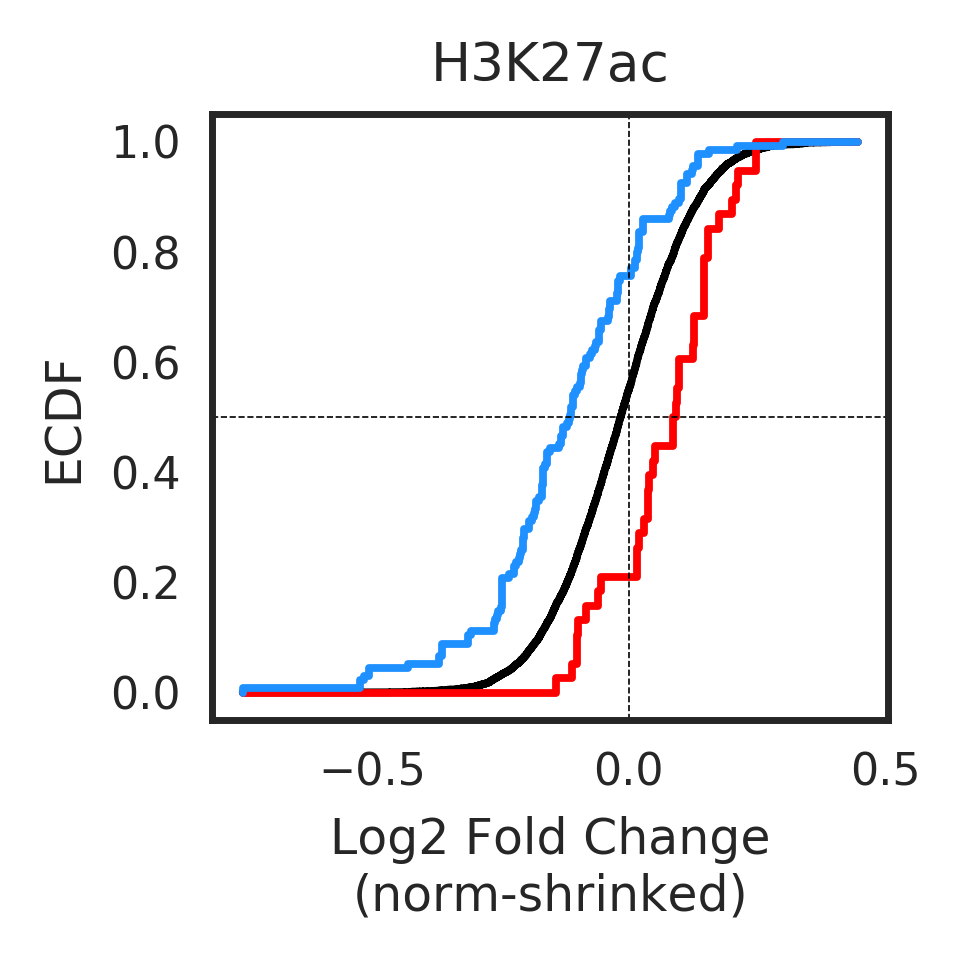

In [58]:
### PLOT EMPIRICAL COMULATIVE DENSITY FUNCTION OF LOG2FC OF H3K27ac PEAKS OVERLAPPING PROMOTERS OF DEG IN NPC48h

plt.figure(dpi=400,figsize=(2.5,2.5))

data = df.log2FoldChange_normal.dropna()
data_up = df.log2FoldChange_normal.loc[exp_de_npc_up].dropna()
data_down = df.log2FoldChange_normal.loc[exp_de_npc_down].dropna()


plt.step(ECDF(data,min(data),max(data))[0], ECDF(data,min(data),max(data))[1], color="k", label = "H3K27ac on all promoters")
plt.step(ECDF(data_up,min(data),max(data))[0], ECDF(data_up,min(data),max(data))[1], color="r", label = "H3K27ac on promoters\nof Upreg genes")
plt.step(ECDF(data_down,min(data),max(data))[0], ECDF(data_down,min(data),max(data))[1], color="dodgerblue", label = "H3K27ac on promoters\nof Downreg genes")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')

plt.title("H3K27ac")
plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")

plt.tight_layout()

plt.savefig("../FIGURES/H3K27ac_ECDF_NPC48h.png")

# mESC

In [59]:
### IMPORT DIFFERENTIAL EXPRESSION ANALYSIS FOR mESC ###

exp_de_esc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")
exp_de_esc_up = exp_de_esc.loc[(exp_de_esc.padj<0.05)&(exp_de_esc.log2FoldChange>0)].index
exp_de_esc_down = exp_de_esc.loc[(exp_de_esc.padj<0.05)&(exp_de_esc.log2FoldChange<0)].index

In [60]:
### IMPORT DIFFERENTIAL H3K4me3 PEAKS ANALYSIS FOR mESC ###

peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K4me3/REFERENCE_TABLE_H3K4me3.bed",sep="\t")
de_peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K4me3/resLFC_normal.tsv",sep="\t")
de_peaks_esc.columns = ["{}_normal".format(i) for i in list(de_peaks_esc)]
de_peaks_esc = de_peaks_esc[["log2FoldChange_normal"]]
df = peaks_esc.merge(de_peaks_esc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000073371.3,17,82538258,82539545,17_82538258_82539545,5.787951,-4.563602e-07,0.613287,0.999958,ENSMUSG00000073371.3,Gm6594,promoter-TSS,ENSMUSG00000073371.3,-0.009392
ENSMUSG00000040940.18,7,24901912,24903912,7_24901912_24903912,331.216403,-2.530096e-06,0.934728,0.999958,ENSMUSG00000003379.7,Cd79a,promoter-TSS,ENSMUSG00000040940.18,0.005962
ENSMUSG00000040940.18,7,24901912,24903912,7_24901912_24903912,331.216403,-2.530096e-06,0.934728,0.999958,ENSMUSG00000040940.18,Arhgef1,promoter-TSS,ENSMUSG00000040940.18,0.005962
ENSMUSG00000025808.17,8,129064517,129066517,8_129064517_129066517,7.797136,-4.739094e-07,0.620002,0.999958,ENSMUSG00000025808.17,Ccdc7a,promoter-TSS,ENSMUSG00000025808.17,-0.009722
ENSMUSG00000046699.14,X,64275996,64277996,X_64275996_64277996,170.003707,5.597056e-06,0.174289,0.999958,ENSMUSG00000046699.14,Slitrk4,promoter-TSS,ENSMUSG00000046699.14,0.090559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000020214.10,10,112082354,112084354,10_112082354_112084354,27.142798,-1.378169e-06,0.154349,0.999958,ENSMUSG00000020214.10,Glipr1l2,promoter-TSS,ENSMUSG00000020214.10,-0.038086
ENSMUSG00000041794.13,9,120300513,120302513,9_120300513_120302513,27.544479,-8.477541e-09,0.983209,0.999958,ENSMUSG00000041794.13,Myrip,promoter-TSS,ENSMUSG00000041794.13,-0.000279
ENSMUSG00000036099.16,10,94035001,94037001,10_94035001_94037001,579.712486,-3.563499e-07,0.999958,0.999958,ENSMUSG00000110869.1,RP23-40D21.1,promoter-TSS,ENSMUSG00000036099.16,-0.000004


/package/anaconda3/bin/ipython:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import re
/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


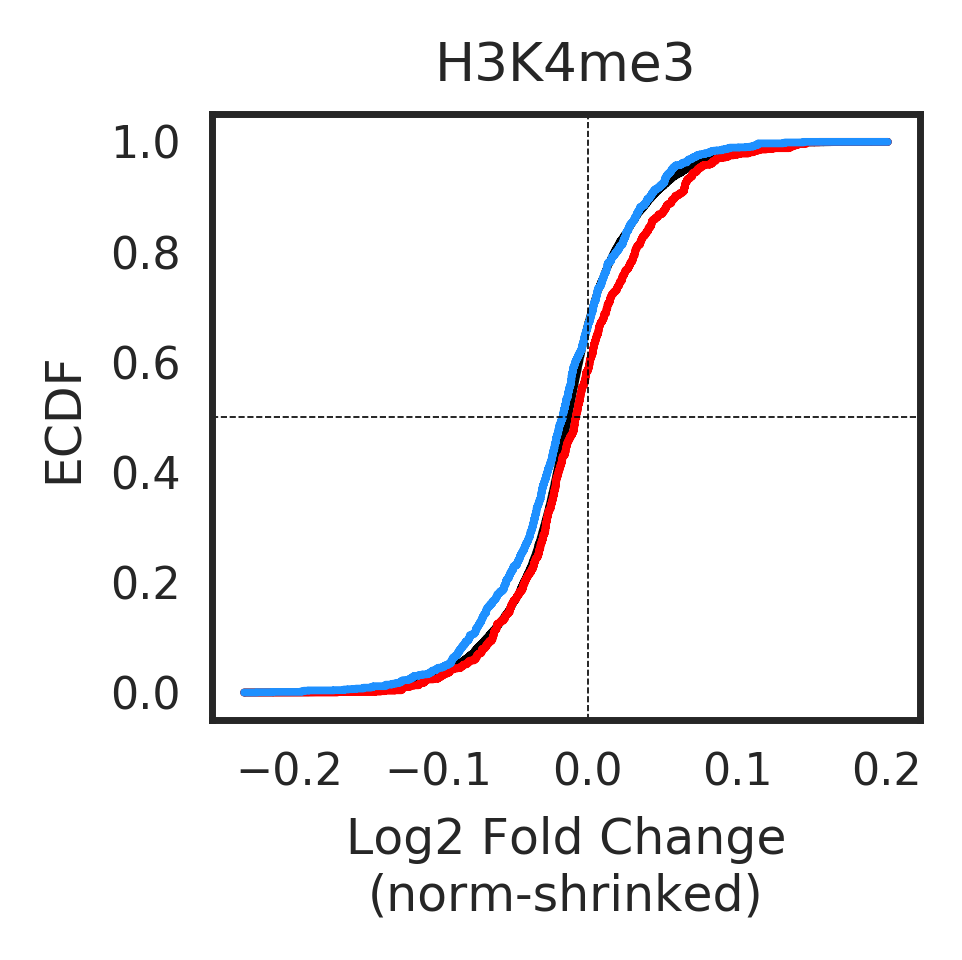

In [62]:
### PLOT EMPIRICAL COMULATIVE DENSITY FUNCTION OF LOG2FC OF H3K4me3 PEAKS OVERLAPPING PROMOTERS OF DEG IN mESC ###

plt.figure(dpi=400,figsize=(2.5,2.5))

data = df.log2FoldChange_normal.dropna()
data_up = df.log2FoldChange_normal.loc[exp_de_esc_up].dropna()
data_down = df.log2FoldChange_normal.loc[exp_de_esc_down].dropna()

plt.step(ECDF(data,min(data),max(data))[0], ECDF(data,min(data),max(data))[1], color="k", label = "H3K4me3 on all promoters")
plt.step(ECDF(data_up,min(data),max(data))[0], ECDF(data_up,min(data),max(data))[1], color="r", label = "H3K4me3 on promoters\nof Upreg genes")
plt.step(ECDF(data_down,min(data),max(data))[0], ECDF(data_down,min(data),max(data))[1], color="dodgerblue", label = "H3K4me3 on promoters\nof Downreg genes")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')

plt.title("H3K4me3")

plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")

plt.tight_layout()

plt.savefig("../FIGURES/H3K4me3_ECDF_mESC.png")

In [65]:
### IMPORT DIFFERENTIAL H3K27ac PEAKS ANALYSIS FOR mESC ###

peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K27ac/REFERENCE_TABLE_H3K27ac.bed",sep="\t")
de_peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K27ac/resLFC_normal.tsv",sep="\t")
de_peaks_esc.columns = ["{}_normal".format(i) for i in list(de_peaks_esc)]
de_peaks_esc = de_peaks_esc[["log2FoldChange_normal"]]
df = peaks_esc.merge(de_peaks_esc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000050108.12,10,86010895,86012895,10_86010895_86012895,70.536858,-1.451630e-07,0.864193,0.999972,ENSMUSG00000050108.12,Bpifc,promoter-TSS,ENSMUSG00000050108.12,-0.019121
ENSMUSG00000040035.14,2,118778719,118780719,2_118778719_118780719,139.191638,-2.137167e-06,0.682026,0.999972,ENSMUSG00000040035.14,Disp2,promoter-TSS,ENSMUSG00000040035.14,-0.048128
ENSMUSG00000030263.13,6,145114653,145116653,6_145114653_145116653,209.128051,3.604659e-06,0.204689,0.999972,ENSMUSG00000030263.13,Lrmp,promoter-TSS,ENSMUSG00000030263.13,0.147132
ENSMUSG00000015461.15,17,34646146,34648146,17_34646146_34648146,566.035621,8.157173e-06,0.955915,0.999972,ENSMUSG00000015461.15,Atf6b,promoter-TSS,ENSMUSG00000015461.15,-0.006717
ENSMUSG00000015461.15,17,34646146,34648146,17_34646146_34648146,566.035621,8.157173e-06,0.955915,0.999972,ENSMUSG00000033739.8,Fkbpl,promoter-TSS,ENSMUSG00000015461.15,-0.006717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000047897.10,9,87014537,87016537,9_87014537_87016537,116.290246,1.401525e-06,0.560647,0.999972,ENSMUSG00000047897.10,Ripply2,promoter-TSS,ENSMUSG00000047897.10,0.065446
ENSMUSG00000050534.8,1,121527465,121529465,1_121527465_121529465,84.254930,3.016285e-06,0.244897,0.999972,ENSMUSG00000050534.8,Htr5b,promoter-TSS,ENSMUSG00000050534.8,0.132192
ENSMUSG00000058806.14,10,61978108,61980108,10_61978108_61980108,89.895234,-8.215811e-07,0.764581,0.999972,ENSMUSG00000058806.14,Col13a1,promoter-TSS,ENSMUSG00000058806.14,-0.033995


/package/anaconda3/bin/ipython:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/package/anaconda3/bin/ipython:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from IPython import start_ipython


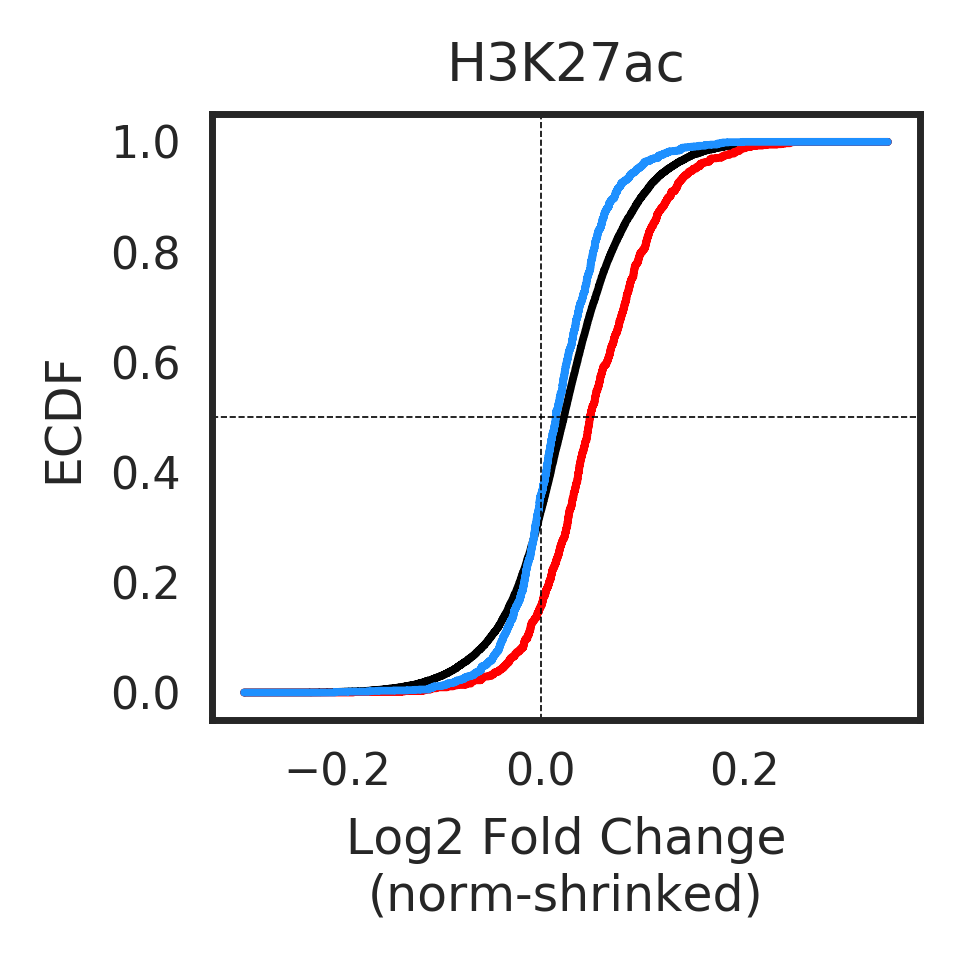

In [66]:
### PLOT EMPIRICAL COMULATIVE DENSITY FUNCTION OF LOG2FC OF H3K27ac PEAKS OVERLAPPING PROMOTERS OF DEG IN mESC ###

plt.figure(dpi=400,figsize=(2.5,2.5))

data = df.log2FoldChange_normal.dropna()
data_up = df.log2FoldChange_normal.loc[exp_de_esc_up].dropna()
data_down = df.log2FoldChange_normal.loc[exp_de_esc_down].dropna()


plt.step(ECDF(data,min(data),max(data))[0], ECDF(data,min(data),max(data))[1], color="k", label = "H3K27ac on all promoters")
plt.step(ECDF(data_up,min(data),max(data))[0], ECDF(data_up,min(data),max(data))[1], color="r", label = "H3K27ac on promoters\nof Upreg genes")
plt.step(ECDF(data_down,min(data),max(data))[0], ECDF(data_down,min(data),max(data))[1], color="dodgerblue", label = "H3K27ac on promoters\nof Downreg genes")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')

plt.title("H3K27ac")
plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")

plt.tight_layout()

plt.savefig("../FIGURES/H3K27ac_ECDF_mESC.png")